Press model num :23
(455547, 54, 4)
(455547, 1)
149637.0


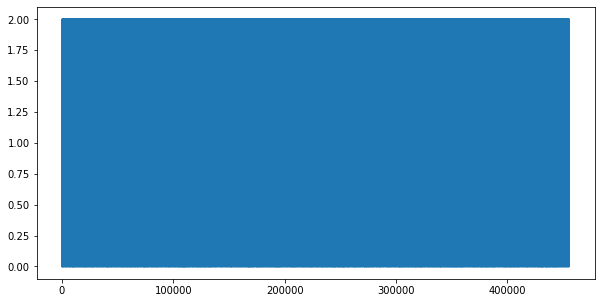

(303698, 54, 4, 1)
(75925, 54, 4, 1)
(75924, 54, 4, 1)
(303698, 3)
(75925, 3)
(75924, 3)


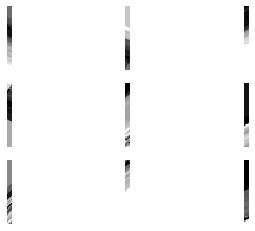


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 54, 4, 1)          0         
_________________________________________________________________
conv1_1 (Conv2D)             (None, 54, 4, 100)        1000      
_________________________________________________________________
batch_normalization_1 (Batch (None, 54, 4, 100)        400       
_________________________________________________________________
pool1_1 (MaxPooling2D)       (None, 27, 2, 100)        0         
_________________________________________________________________
conv2_1 (Conv2D)             (None, 27, 2, 100)        90100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 27, 2, 100)        400       
_________________________________________________________________
pool2_1 (MaxPooling2D)       (None, 13, 1, 100)        0  


Epoch 00034: val_loss did not improve from 0.28262
Epoch 35/100
 - 65s - loss: 0.6642 - accuracy: 0.7821 - val_loss: 0.7010 - val_accuracy: 0.7858

Epoch 00035: val_loss did not improve from 0.28262
Epoch 36/100
 - 65s - loss: 0.6642 - accuracy: 0.7821 - val_loss: 0.8128 - val_accuracy: 0.7858

Epoch 00036: val_loss did not improve from 0.28262
Epoch 37/100
 - 65s - loss: 0.6643 - accuracy: 0.7821 - val_loss: 0.6271 - val_accuracy: 0.7858

Epoch 00037: val_loss did not improve from 0.28262
Epoch 38/100
 - 65s - loss: 0.6641 - accuracy: 0.7821 - val_loss: 0.6128 - val_accuracy: 0.7858

Epoch 00038: val_loss did not improve from 0.28262
Epoch 39/100
 - 65s - loss: 0.6643 - accuracy: 0.7821 - val_loss: 0.6252 - val_accuracy: 0.7858

Epoch 00039: val_loss did not improve from 0.28262
Epoch 40/100
 - 65s - loss: 0.6641 - accuracy: 0.7821 - val_loss: 0.6700 - val_accuracy: 0.7858

Epoch 00040: val_loss did not improve from 0.28262
Epoch 41/100
 - 65s - loss: 0.6640 - accuracy: 0.7822 - val_

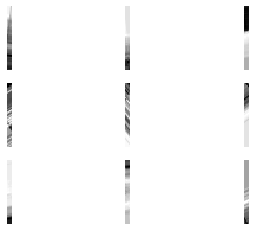

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 54, 4, 1)          0         
_________________________________________________________________
conv1_1 (Conv2D)             (None, 54, 4, 100)        1000      
_________________________________________________________________
batch_normalization_3 (Batch (None, 54, 4, 100)        400       
_________________________________________________________________
pool1_1 (MaxPooling2D)       (None, 27, 2, 100)        0         
_________________________________________________________________
conv2_1 (Conv2D)             (None, 27, 2, 100)        90100     
_________________________________________________________________
batch_normalization_4 (Batch (None, 27, 2, 100)        400       
_________________________________________________________________
pool2_1 (MaxPooling2D)       (None, 13, 1, 100)        0   

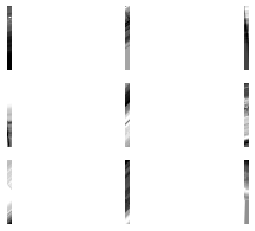

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 54, 4, 1)          0         
_________________________________________________________________
conv1_1 (Conv2D)             (None, 54, 4, 100)        1000      
_________________________________________________________________
batch_normalization_5 (Batch (None, 54, 4, 100)        400       
_________________________________________________________________
pool1_1 (MaxPooling2D)       (None, 27, 2, 100)        0         
_________________________________________________________________
conv2_1 (Conv2D)             (None, 27, 2, 100)        90100     
_________________________________________________________________
batch_normalization_6 (Batch (None, 27, 2, 100)        400       
_________________________________________________________________
pool2_1 (MaxPooling2D)       (None, 13, 1, 100)        0   

In [4]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   
os.environ["CUDA_VISIBLE_DEVICES"]="0"

import pandas as pd
import numpy as np
from matplotlib import pyplot
import scipy.misc 
from math import sqrt 
import itertools
from IPython.display import display
%matplotlib inline

# input_data_length = int(input('input_data_length : '))
input_data_length = 54
model_num = input('Press model num :')

Made_X = np.load('Made_X/Made_X %s_%s.npy' % (input_data_length, model_num))
Made_Y = np.load('Made_X/Made_Y %s_%s.npy' % (input_data_length, model_num))

print(Made_X.shape)
print(Made_Y.shape)
print(np.sum(Made_Y))

pyplot.figure(figsize=(10,5))
pyplot.plot(Made_Y)
pyplot.show()

row = Made_X.shape[1]
col = Made_X.shape[2]

# Data slicing with KFold
# total_len = len(Made_X)
# train_len = int(total_len * 0.7)
# val_len = int(total_len * 0.15)
# test_len = total_len - (train_len + val_len)

# X_train = Made_X[:train_len].astype('float32').reshape(-1, input_data_length, col, 1)
#     X_val = Made_X[train_len:train_len + val_len].astype('float32').reshape(-1, input_data_length, col, 1)
#     X_test = Made_X[train_len + val_len:].astype('float32').reshape(-1, input_data_length, col, 1)
from sklearn.model_selection import KFold, train_test_split
kf = KFold(n_splits=3)
for train_idx, test_idx in kf.split(Made_X):
    X_train, X_test = Made_X[train_idx], Made_X[test_idx]
    Y_train, Y_test = Made_Y[train_idx], Made_Y[test_idx]
    X_test, X_val, Y_test, Y_val = train_test_split(X_test, Y_test, test_size=0.5,
                                                   shuffle=True)
    
    X_train = X_train.astype('float32').reshape(-1, input_data_length, col, 1)
    X_val = X_val.astype('float32').reshape(-1, input_data_length, col, 1)
    X_test = X_test.astype('float32').reshape(-1, input_data_length, col, 1)

    print(X_train.shape)
    print(X_val.shape)
    print(X_test.shape)


    from keras.utils import np_utils
    from keras.preprocessing.image import ImageDataGenerator 

#     Y_train = Made_Y[:train_len].astype('float32')
#     Y_val = Made_Y[train_len:train_len + val_len].astype('float32')
#     Y_test = Made_Y[train_len + val_len:].astype('float32')
    Y_train = Y_train.astype('float32')
    Y_val = Y_val.astype('float32')
    Y_test = Y_test.astype('float32')
    num_classes = 3
    Y_train = np_utils.to_categorical(Y_train, num_classes)
    Y_val = np_utils.to_categorical(Y_val, num_classes)
    Y_test = np_utils.to_categorical(Y_test, num_classes)
    print(Y_train.shape)
    print(Y_val.shape)
    print(Y_test.shape)

    datagen = ImageDataGenerator( 
        rotation_range = 60,
        horizontal_flip = True,
        width_shift_range=0.6,
        height_shift_range=0.6,
        fill_mode = 'nearest'
        )

    testgen = ImageDataGenerator( 
        )
    datagen.fit(X_train)
    batch_size = 128

    for X_batch, _ in datagen.flow(X_train, Y_train, batch_size=9):
        for i in range(0, 9): 
            pyplot.axis('off') 
            pyplot.subplot(330 + 1 + i) 
            pyplot.imshow(X_batch[i].reshape(input_data_length, col), cmap=pyplot.get_cmap('gray'))
        pyplot.axis('off') 
        pyplot.show() 
        break


    train_flow = datagen.flow(X_train, Y_train, batch_size=batch_size) 
    val_flow = testgen.flow(X_val, Y_val, batch_size=batch_size) 
    test_flow = testgen.flow(X_test, Y_test, batch_size=batch_size)


    from keras.utils import plot_model
    import keras.backend as K
    from keras.models import Model, Sequential
    from keras.layers import LSTM, TimeDistributed, Input, Dense, Flatten, Dropout, BatchNormalization, Conv1D
    from keras.layers.convolutional import Conv2D
    from keras.layers.pooling import MaxPooling2D, MaxPooling1D
    from keras.layers.merge import concatenate
    from keras.optimizers import Adam, SGD
    from keras.regularizers import l1, l2
    from sklearn.metrics import confusion_matrix

    def FER_Model(input_shape=(input_data_length, col, 1)):
        # first input model
        visible = Input(shape=input_shape, name='input')
        conv1_fit = 100
        conv2_fit = 100
        conv3_fit = 128
        # conv4_fit = 256
        # conv5_fit = 256

        #the 1-st block
        conv1_1 = Conv2D(conv1_fit, kernel_size=3, activation='relu', padding='same', name = 'conv1_1')(visible)
        conv1_1 = BatchNormalization()(conv1_1)
        # conv1_2 = Conv2D(conv1_fit, kernel_size=3, activation='relu', padding='same', name = 'conv1_2')(conv1_1)
        # conv1_2 = BatchNormalization()(conv1_2)
        pool1_1 = MaxPooling2D(pool_size=(2,2), name = 'pool1_1')(conv1_1)
        # drop1_1 = Dropout(0.3, name = 'drop1_1')(pool1_1)

        #the 2-nd block
        conv2_1 = Conv2D(conv2_fit, kernel_size=3, activation='relu', padding='same', name = 'conv2_1')(pool1_1)
        conv2_1 = BatchNormalization()(conv2_1)
        # conv2_2 = Conv2D(conv2_fit, kernel_size=3, activation='relu', padding='same', name = 'conv2_2')(conv2_1)
        # conv2_2 = BatchNormalization()(conv2_2)
        # conv2_3 = Conv2D(conv2_fit, kernel_size=3, activation='relu', padding='same', name = 'conv2_3')(conv2_2)
        # conv2_3 = BatchNormalization()(conv2_3)
        pool2_1 = MaxPooling2D(pool_size=(2,2), name = 'pool2_1')(conv2_1)
        drop2_1 = Dropout(0.3, name = 'drop2_1')(pool2_1)

        #Flatten and output
        flatten = Flatten(name = 'flatten')(drop2_1)
        dense = Dense(100, activation='relu', name='dense')(flatten)
        output = Dense(num_classes, activation='softmax', name = 'output')(dense)

        # create model 
        model = Model(inputs =visible, outputs = output)
        # summary layers
        print(model.summary())      

        return model

    model = FER_Model()
    opt = Adam(lr=0.0001, decay=1e-6)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    # callbacks log 를 저장시키는 방법 예시
    from keras.callbacks import Callback
    import pickle

    class Checkpoint_History(Callback):

        def on_train_begin(self, logs={}):
            self.loss = []
            self.val_loss = []
            self.acc = []
            self.val_acc = []      

        def on_batch_end(self, batch, logs={}):
            self.loss.append(logs.get('loss'))
            self.val_loss.append(logs.get('val_loss'))
            self.acc.append(logs.get('acc'))
            self.val_acc.append(logs.get('val_acc'))


    from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
    filepath="model/rapid_ascending %s_%s.hdf5" % (input_data_length, model_num)
    checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
    checkpoint2 = TensorBoard(log_dir='Tensorboard_graph',
                              histogram_freq=0,
                              write_graph=True,
                              write_images=True)
    checkpoint3 = EarlyStopping(monitor='val_loss', patience=15)
    callbacks_list = [checkpoint, checkpoint2, checkpoint3]

    # keras.callbacks.Callback 로 부터 log 를 받아와 history log 를 작성할 수 있다.

    # we iterate 200 times over the entire training set
    num_epochs = 100
    history = model.fit_generator(train_flow, 
                        steps_per_epoch=len(X_train) / batch_size, 
                        epochs=num_epochs,  
                        verbose=2,  
                        callbacks=callbacks_list,
                        validation_data=val_flow,  
                        validation_steps=len(X_val) / batch_size,
                        shuffle=False)



In [ ]:
from keras.models import load_model

model = load_model('model/rapid_ascending %s_%s.hdf5' % (input_data_length, model_num))
# model = load_model('/content/gdrive/My Drive/Colab Notebooks/model/rapid_ascending %s.hdf5' % input_data_length)
loss = model.evaluate_generator(test_flow, steps=len(X_test) / batch_size) 
print("Test Loss " + str(loss[0]))
print("Test Acc: " + str(loss[1]))

loss = model.evaluate(X_val, Y_val) 
print(X_val.shape)
print(Y_val.shape)

print("Val Loss " + str(loss[0]))
print("Val Acc: " + str(loss[1]))

#     Prediction    #
Y_pred_ = model.predict(X_test, verbose=1)

# Y_pred = Y_pred_[:,[-1]]
# print(Y_pred.shape)
# print(Y_test.shape)
Y_pred = np.argmax(Y_pred_, axis=1)
t_te = np.argmax(Y_test, axis=1)

#     Manual processing     #
Y_pred_one = Y_pred_[:, [-1]]
max_value = np.max(Y_pred_one)
print(max_value)

limit_line = 0.9
Y_pred_one = np.where(Y_pred_one > max_value * limit_line, 1, 0)

# print(Y_pred_one)
Y_pred_one = Y_pred_one.reshape(-1,)
# print(Y_pred_1)
# print(Y_pred.shape)
# print(t_te.shape)

# fail = 0
# fail2 = 0
# for i in range(len(Y_pred)):
#   if Y_pred_1[i] != t_te[i]:
#     fail += 1

#   if Y_pred[i] != t_te[i]:
#     fail2 += 1

# print(1 - fail / len(Y_pred))
# print(1 - fail2 / len(Y_pred))

# print(np.sum(Y_pred), np.sum(t_te))
# print('Y_pred / Y_test :', np.sum(Y_pred) / np.sum(t_te))

plt.figure(figsize=(100,10))
plt.subplot(211)
plt.plot(Y_test, 'purple', label='test')

plt.subplot(212)
plt.plot(Y_pred_one, 'y', label='pred')
plt.show()
# plt.savefig('/content/gdrive/My Drive/Colab Notebooks/model/rapid_ascending %s.png' % input_data_length)
# plt.close()